<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/3_binning_cut_qcut_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Binning / Descretization of Continuous features using pandas.cut()**

### **Binning / Descretization of Continuous features using pandas.qcut()**

---------------------

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv("/content/drive/MyDrive/Kaggle/House-Price-Prediction.zip")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


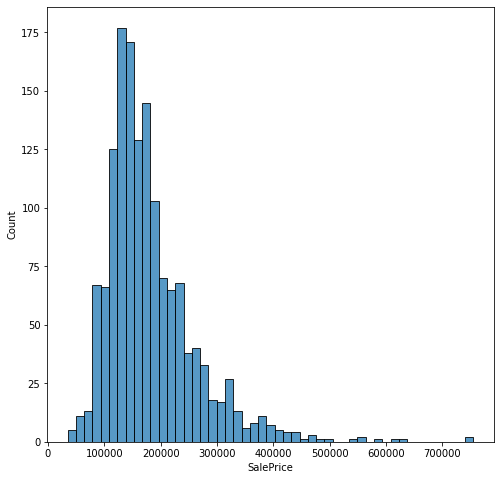

In [8]:
plt.figure(figsize=(8,8))
sns.histplot(x=train['SalePrice']);

In [11]:
train.loc[:,['SalePrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


### **Binning / Descretization of Continuous features using pandas.cut()**

In [12]:
# descritize into five equal bins
s1 = pd.cut(x=train['SalePrice'], bins=5, labels=None, retbins=False, duplicates='raise', ordered=True)
s1

0       (178920.0, 322940.0]
1       (178920.0, 322940.0]
2       (178920.0, 322940.0]
3        (34179.9, 178920.0]
4       (178920.0, 322940.0]
                ...         
1455     (34179.9, 178920.0]
1456    (178920.0, 322940.0]
1457    (178920.0, 322940.0]
1458     (34179.9, 178920.0]
1459     (34179.9, 178920.0]
Name: SalePrice, Length: 1460, dtype: category
Categories (5, interval[float64]): [(34179.9, 178920.0] < (178920.0, 322940.0] < (322940.0, 466960.0] <
                                    (466960.0, 610980.0] < (610980.0, 755000.0]]

In [15]:
# labels=False implies you just want the bins back
s2 = pd.cut(x=train['SalePrice'], bins=5, labels=False, retbins=False, duplicates='raise', ordered=True)
s2

0       1
1       1
2       1
3       0
4       1
       ..
1455    0
1456    1
1457    1
1458    0
1459    0
Name: SalePrice, Length: 1460, dtype: int64

In [16]:
# specifies the labels for the returned bins
labels = ['Low', 'Moderate', 'High', 'Very High', 'Extreme']

s3 = pd.cut(x=train['SalePrice'], bins=5, labels=labels, retbins=False, duplicates='raise', ordered=True)
s3

0       Moderate
1       Moderate
2       Moderate
3            Low
4       Moderate
          ...   
1455         Low
1456    Moderate
1457    Moderate
1458         Low
1459         Low
Name: SalePrice, Length: 1460, dtype: category
Categories (5, object): ['Low' < 'Moderate' < 'High' < 'Very High' < 'Extreme']

In [17]:
# retbins=True
labels = ['Low', 'Moderate', 'High', 'Very High', 'Extreme']

s3 = pd.cut(x=train['SalePrice'], bins=5, labels=labels, retbins=True, duplicates='raise', ordered=True)
s3

(0       Moderate
 1       Moderate
 2       Moderate
 3            Low
 4       Moderate
           ...   
 1455         Low
 1456    Moderate
 1457    Moderate
 1458         Low
 1459         Low
 Name: SalePrice, Length: 1460, dtype: category
 Categories (5, object): ['Low' < 'Moderate' < 'High' < 'Very High' < 'Extreme'],
 array([ 34179.9, 178920. , 322940. , 466960. , 610980. , 755000. ]))

In [19]:
seq_bins = [34900, 129975, 163000, 214000, 755000]

s3 = pd.cut(x=train['SalePrice'], bins=seq_bins, labels=None, retbins=False, duplicates='raise', ordered=True)
s3

0       (163000, 214000]
1       (163000, 214000]
2       (214000, 755000]
3       (129975, 163000]
4       (214000, 755000]
              ...       
1455    (163000, 214000]
1456    (163000, 214000]
1457    (214000, 755000]
1458    (129975, 163000]
1459    (129975, 163000]
Name: SalePrice, Length: 1460, dtype: category
Categories (4, interval[int64]): [(34900, 129975] < (129975, 163000] < (163000, 214000] <
                                  (214000, 755000]]

### **Binning / Descretization of Continuous features using pandas.qcut()**

In [20]:
# discretize variable into equal-sized buckets based on rank or based on sample quantile

s7 = pd.qcut(train['SalePrice'], q=4, labels=None)
s7

0       (163000.0, 214000.0]
1       (163000.0, 214000.0]
2       (214000.0, 755000.0]
3       (129975.0, 163000.0]
4       (214000.0, 755000.0]
                ...         
1455    (163000.0, 214000.0]
1456    (163000.0, 214000.0]
1457    (214000.0, 755000.0]
1458    (129975.0, 163000.0]
1459    (129975.0, 163000.0]
Name: SalePrice, Length: 1460, dtype: category
Categories (4, interval[float64]): [(34899.999, 129975.0] < (129975.0, 163000.0] < (163000.0, 214000.0] <
                                    (214000.0, 755000.0]]

In [21]:
s8 = pd.qcut(train['SalePrice'], q=4, labels=False)
s8

0       2
1       2
2       3
3       1
4       3
       ..
1455    2
1456    2
1457    3
1458    1
1459    1
Name: SalePrice, Length: 1460, dtype: int64

In [22]:
s9 = pd.qcut(train['SalePrice'], q=5, labels=labels, retbins=True)
s9

(0       Very High
 1       Very High
 2       Very High
 3        Moderate
 4         Extreme
           ...    
 1455         High
 1456    Very High
 1457      Extreme
 1458     Moderate
 1459         High
 Name: SalePrice, Length: 1460, dtype: category
 Categories (5, object): ['Low' < 'Moderate' < 'High' < 'Very High' < 'Extreme'],
 array([ 34900., 124000., 147000., 179280., 230000., 755000.]))